In [170]:
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stats
import seaborn as sns
from pydataset import data
import env

For each of the following questions, formulate a null and alternative hypothesis (be as specific as you can be), then give an example of what a true positive, true negative, type I and type II errors would look like. Note that some of the questions are intentionally phrased in a vague way. It is your job to reword these as more precise questions that could be tested.

- Has the network latency gone up since we switched internet service providers?
- Is the website redesign any good?
- Is our television ad driving more sales?

#### Has the network latency gone up since we switched internet service providers?Ho:  latency has remained the same or decrease
$H_{0}$ :  Service providers has no effect on network latency

$H_{a}$ : Service providers has effect on network latency

True Positive: service provider limit bandwith on congestion

True Negative: slow computer

type I: Playing game on 4K graphics increases network latency  

type II: Service provider internet speed is low

#### Is the website redesign any good?
$H_{0}$ : website redesign has no effect on website traffic

$H_{a}$ : website redesign has effect on website traffic

True Positive: 

True Negative: 

type I: users visit website to use redesign website

type II: users visit website because of promo coupon code

#### Is our television ad driving more sales?
$H_{0}$ : television ad has no effect on sale

$H_{a}$ : television ad has effect sale

True Positive: customers said that they bought items after watching ad

True Negative: 

type I: no change on number of sales after airing ad

type II: newspaper coupons increasing sales

#### Answer with the type of test you would use (assume normal distribution):

   - Is there a difference in grades of students on the second floor compared to grades of all students?
    
   - Are adults who drink milk taller than adults who dont drink milk?
     
   - Is the the price of gas higher in texas or in new mexico?    
    
   - Are there differences in stress levels between students who take data science vs students who take web development vs students who take cloud academy?
   

2-tail One Sample T-Test

2-tail Independent T-Test

1-tail Independent T-Test, greater than

ANOVA Analysis of Variance


#### 2. Ace Realty wants to determine whether the average time it takes to sell homes is different for its two offices. A sample of 40 sales from office #1 revealed a mean of 90 days and a standard deviation of 15 days. A sample of 50 sales from office #2 revealed a mean of 100 days and a standard deviation of 20 days. Use a .05 level of significance.

####  3. Load the mpg dataset and use it to answer the following questions:

    - Is there a difference in fuel-efficiency in cars from 2008 vs 1999? 
    
    - Are compact cars more fuel-efficient than the average car?
    
    - Do manual cars get better gas mileage than automatic cars?

In [171]:
df = data('mpg')
df.head()


,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class
1,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact
2,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact
3,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact
4,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact
5,audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact


In [172]:
df.year.value_counts()

1999    117
2008    117
Name: year, dtype: int64

In [173]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 234 entries, 1 to 234
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   manufacturer  234 non-null    object 
 1   model         234 non-null    object 
 2   displ         234 non-null    float64
 3   year          234 non-null    int64  
 4   cyl           234 non-null    int64  
 5   trans         234 non-null    object 
 6   drv           234 non-null    object 
 7   cty           234 non-null    int64  
 8   hwy           234 non-null    int64  
 9   fl            234 non-null    object 
 10  class         234 non-null    object 
dtypes: float64(1), int64(4), object(6)
memory usage: 21.9+ KB


In [174]:
df['fuel_efficiency'] = (df.cty + df.hwy)/2
df

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class,fuel_efficiency
1,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact,23.5
2,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact,25.0
3,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact,25.5
4,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact,25.5
5,audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact,21.0
...,...,...,...,...,...,...,...,...,...,...,...,...
230,volkswagen,passat,2.0,2008,4,auto(s6),f,19,28,p,midsize,23.5
231,volkswagen,passat,2.0,2008,4,manual(m6),f,21,29,p,midsize,25.0
232,volkswagen,passat,2.8,1999,6,auto(l5),f,16,26,p,midsize,21.0
233,volkswagen,passat,2.8,1999,6,manual(m5),f,18,26,p,midsize,22.0


In [175]:
year_1999 = df[df.year == 1999].fuel_efficiency
year_2008 = df[df.year == 2008].fuel_efficiency

<AxesSubplot:>

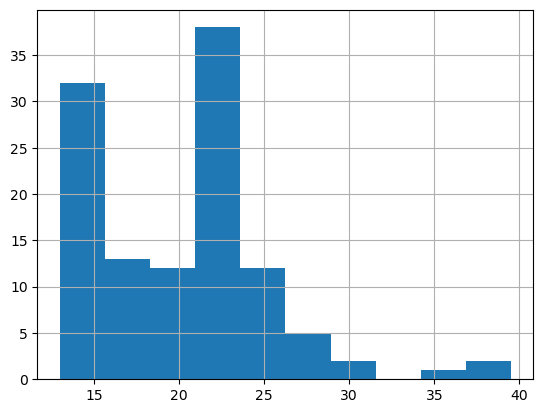

In [176]:
year_1999.hist()

<AxesSubplot:>

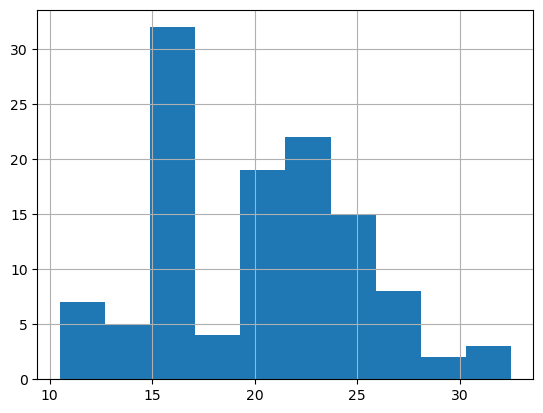

In [177]:
year_2008.hist()

#### Hypothesis
$H_{0}$ : cars from 2008 and 1999 has no difference in fuel-efficiency

$H_{a}$ : cars from 2008 and 1999 has difference in fuel- efficiency

#### Significane Level
Alpha set to 0.05

In [178]:
alpha = 0.05

#### Verify assumptions

- Independent sample
- Normal Distribution, or at least 30 observations
- Equal Variance

In [179]:
t, p = stats.levene(year_1999, year_2008)
t, p

(0.033228136671080453, 0.855517569468803)

In [180]:
t, p = stats.kruskal(year_1999, year_2008)
t, p

(0.10300393353208691, 0.7482541485808683)

#### Decide:
    
- p-value < alpha

In [181]:
# Is there a difference in fuel-efficiency in cars from 2008 vs 1999?

if p < alpha:
    print('Reject $H_{0}$')
else: 
    print('Fail to reject $H_{0}$ ')



Fail to reject $H_{0}$ 


##### Are compact cars more fuel-efficient than the average car?

#### Hypothesis
$H_{0}$ :mean of fuel-efficient of compacts car not greater than mean of fuel-efficient of all cars

$H_{a}$ : mean of fuel-efficient of compacts car greater than mean of fuel-efficient of all cars

#### Significane Level
Alpha set to 0.05

In [182]:
alpha = 0.05

##### Verify Assumptions

- Normal Distribution, or at least 30 observations 

In [188]:
df['class'].value_counts()

suv           62
compact       47
midsize       41
subcompact    35
pickup        33
minivan       11
2seater        5
Name: class, dtype: int64

In [190]:
compact_sample = df[df['class'] == 'compact'].fuel_efficiency
overall_mean = df.fuel_efficiency.mean()
overall_mean


20.14957264957265

#### Compute test statistic and probability (t-statistic & p-value)

In [194]:
t, p = stats.ttest_1samp(compact_sample, overall_mean)
t, p/2

(7.896888573132533, 2.0992818971585743e-10)

#### Decide

- p/2 < alpha and t > 0


In [195]:
if p/2 > alpha:
    print("We fail to reject $H_{0}$")
elif t < 0:
    print("We fail to reject $H_{0}$")
else:
    print("We reject $H_{0}$")


We reject $H_{0}$


#### Do manual cars get better gas mileage than automatic cars?

#### Hypothesis

𝐻0  : gas mileage of manual cars not greater than gas mileage of automatic car

𝐻𝑎  : gas mileage of manual cars greater than gas mileage of automatic car

#### Significane Level

Alpha set to 0.05

In [198]:
alpha = 0.05

In [200]:
df.head()

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class,fuel_efficiency
1,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact,23.5
2,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact,25.0
3,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact,25.5
4,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact,25.5
5,audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact,21.0


In [205]:
manual_sample = df[df.trans.str.startswith('m')].fuel_efficiency
auto_sample =df[df.trans.str.startswith('a')].fuel_efficiency 


#### Verify assumptions

- Independent sample
- Normal Distribution, or at least 30 observations
- Equal Variance

In [206]:
df.trans.value_counts()

auto(l4)      83
manual(m5)    58
auto(l5)      39
manual(m6)    19
auto(s6)      16
auto(l6)       6
auto(av)       5
auto(s5)       3
auto(s4)       3
auto(l3)       2
Name: trans, dtype: int64

In [208]:
manual_sample.var()

26.635167464114826

In [209]:
auto_sample.var()

21.942777233382337

In [210]:
t, p = stats.levene(manual_sample, auto_sample)
t, p/2

(0.20075824847529639, 0.32726381775659286)

#### Compute test statistic and probability (t-statistic & p-value)

#### Decide

- p/2 < alpha and t > 0

In [213]:
if p / 2 > alpha:
    print("We fail to reject $H_{0}$")
elif t < 0:
    print("We fail to reject $H_{0}$")
else:
    print("We reject $H_{0}$")



We fail to reject $H_{0}$
